In [1]:
import numpy as np

In [2]:
def CrankNicolson(u0, A, h, t0, tmax):
    """
    Crank-Nicolson (aka implicit Trapezoidal) Method
    
    Find the implicit solution for a System of ODEs of type 
    ------------
    y' = Ay
    ------------
    where y' and y are vectors of length n and A is a nxn coefficient matrix 
    
    Input:
    u0: Vector containing the initial conditions of the System of ODEs
    A:  Matrix containing the coefficient in the linear System
    h:  Time-step size
    t0: Starting time
    tmax: Endtime
    
    Return:
    time: Array containing the time points
    uj:   Array containing the solution vector u for the N time points computed
    
    """
    assert(np.shape(A)[0] == np.shape(A)[1])
    assert(len(u0) == np.shape(A)[0])
    
    # Construct amplification factor
    n = np.shape(A)[0]
    I = np.identity(n)
    
    B1 = I - h/2 * A
    print("\n[I - h/2 A] = \n", B1)
    
    B2 = I + h/2 * A
    print("\n[I + h/2 A] = \n", B2)
    
    B1inv = np.linalg.inv(B1)
    print("\n[I - h/2 A]^(-1) = \n", B1inv, "\n")
    
    C    = B1inv @ B2
    print("\n[I - h/2 A]^(-1) [I + h/2 A] = \n", C, "\n")
    
    # Initialize arrays for time and solution
    time = np.arange(t0, tmax+h, h)
    N    = len(time)
    uj  = np.zeros((N, n)) # N timepoints, n variables
    
    # Initial condition
    uj[0] = u0
    
    # Time integration
    for j in range(N-1):
        uj[j+1] = C @ uj[j]
        print("u_", j+1, "= ", uj[j+1])
        
    return time, uj
    

In [3]:
# 2nd order ODE of type x'' + ax' + bx can be transformed into system of odes, where x1 = x, x2 = x', etc.

# Initial Conditions
x0  = 1 # = x1
dx0 = 0 # = x2

u0  = [x0, dx0] 

# Time-step size
h   = 0.5

# Coefficients
a = 0.5
b = 1
A = np.array([[0, 1],
              [-b, -a]])

In [4]:
t0   = 0
tmax = 20
time, uj = CrankNicolson(u0, A, h, t0, tmax)


[I - h/2 A] = 
 [[ 1.    -0.25 ]
 [ 0.25   1.125]]

[I + h/2 A] = 
 [[ 1.     0.25 ]
 [-0.25   0.875]]

[I - h/2 A]^(-1) = 
 [[ 0.94736842  0.21052632]
 [-0.21052632  0.84210526]] 


[I - h/2 A]^(-1) [I + h/2 A] = 
 [[ 0.89473684  0.42105263]
 [-0.42105263  0.68421053]] 

u_ 1 =  [ 0.89473684 -0.42105263]
u_ 2 =  [ 0.6232687  -0.66481994]
u_ 3 =  [ 0.27773728 -0.71730573]
u_ 4 =  [-0.05352169 -0.60773014]
u_ 5 =  [-0.3037742  -0.39327991]
u_ 6 =  [-0.43738951 -0.14118133]
u_ 7 =  [-0.45079328  0.08756625]
u_ 8 =  [-0.36647136  0.24972145]
u_ 9 =  [-0.22274955  0.32516577]
u_ 10 =  [-0.06239032  0.31627113]
u_ 11 =  [0.07734387 0.24266565]
u_ 12 =  [0.17137742 0.13346855]
u_ 13 =  [0.20953497 0.01916167]
u_ 14 =  [ 0.19554673 -0.07511463]
u_ 15 =  [ 0.14333565 -0.13372969]
u_ 16 =  [ 0.07194045 -0.15185112]
u_ 17 =  [ 0.00043046 -0.13418885]
u_ 18 =  [-0.05611542 -0.09199467]
u_ 19 =  [-0.08894313 -0.03931618]
u_ 20 =  [-0.09613487  0.0105492 ]
u_ 21 =  [-0.08157365  0.04769571]
u_ 22 

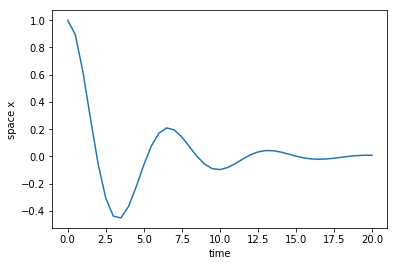

In [6]:
import matplotlib.pyplot as plt
plt.plot(time, uj[:, 0])
plt.xlabel("time")
plt.ylabel("space x")
None